In [19]:
import math

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import seaborn as sns
from sklearn import linear_model

%matplotlib inline
sns.set_style('white')

In [20]:
crime = pd.read_csv('CRIMENY.csv', thousands=",")
crime.columns = ['city', 'population', 'violent crime', 'murder', 'rape1', 'rape2', 'robbery', 'aggravatedd assault', 
                'property_crime', 'burglary', 'larceny', 'motor vehicle theft', 'arson3', 'unnamed3']


In [23]:
data = pd.DataFrame()
data['property_crime'] = crime['property_crime']
data['population'] = crime['population']
data['population_sq'] = (crime['population']**2)
data['murder'] = (crime['murder'] > 0).astype(int)
data['robbery'] = (crime['robbery'] > 0).astype(int)
data = data.dropna()
data.head(10)

,property_crime,population,population_sq,murder,robbery
0,12.0,1861.0,3.463321e+06,0,0
1,24.0,2577.0,6.640929e+06,0,0
2,16.0,2846.0,8.099716e+06,0,0
3,4090.0,97956.0,9.595378e+09,1,1
4,223.0,6388.0,4.080654e+07,0,1
5,46.0,4089.0,1.671992e+07,0,1
6,10.0,1781.0,3.171961e+06,0,0
7,2118.0,118296.0,1.399394e+10,1,1
8,210.0,9519.0,9.061136e+07,0,1
9,405.0,18182.0,3.305851e+08,0,1


In [25]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['property_crime'].values.reshape(-1, 1)
X = data[['population','population_sq', 'murder', 'robbery']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 3.46570268e-02 -2.11108019e-09  1.51866535e+01 -9.62774363e+01]]

Intercept: 
 [-109.57533562]

R-squared:
0.9961247104988709


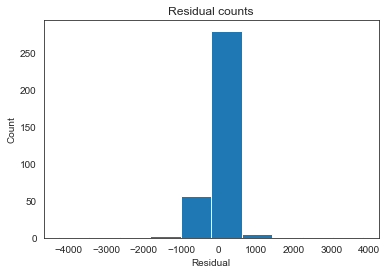

In [26]:
# Extract predicted values.
predicted = regr.predict(X).ravel()
actual = data['property_crime']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

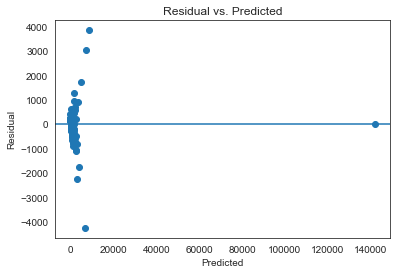

In [9]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [10]:
correlation_matrix = X.corr()
display(correlation_matrix)

,population,population_sq,murder,robbery
population,1.000000,0.998264,0.162309,0.064371
population_sq,0.998264,1.000000,0.133067,0.043983
murder,0.162309,0.133067,1.000000,0.313271
robbery,0.064371,0.043983,0.313271,1.000000


In [27]:
# Write out the model formula.
# Your dependent variable on the right, independent variables on the left
# Use a ~ to represent an '=' from the functional form
linear_formula = 'property_crime ~ population+population_sq+murder+robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data).fit()

In [28]:
lm.params

Intercept       -1.095753e+02
population       3.465703e-02
population_sq   -2.111080e-09
murder           1.518665e+01
robbery         -9.627744e+01
dtype: float64

In [29]:
lm.pvalues

Intercept        7.870415e-03
population       9.300525e-98
population_sq    5.233643e-41
murder           8.625065e-01
robbery          9.118127e-02
dtype: float64

Murder is greater than .05 so we can drop that feature.

In [30]:
lm.rsquared

0.9961247104988709

In [31]:
# Re-fit the model here.
linear_formula = 'property_crime ~ population+population_sq+robbery'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=data).fit()


lm.rsquared

0.996124371124157

In [32]:
lm.conf_int()

,0,1
Intercept,-1.903095e+02,-2.943728e+01
population,3.271164e-02,3.678101e-02
population_sq,-2.363567e-09,-1.879472e-09
robbery,-2.047056e+02,1.543455e+01


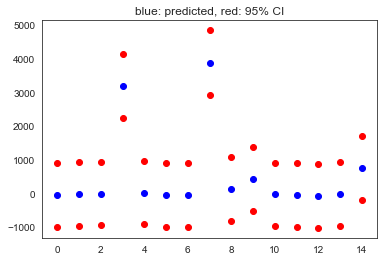

In [33]:
prstd, iv_l, iv_u = wls_prediction_std(lm)

plt.figure()
plt.plot(iv_u[0:15], 'o', color='r')
plt.plot(iv_l[0:15], 'o', color='r')
plt.plot(lm.fittedvalues[0:15], 'o', color='b')
plt.title('blue: predicted, red: 95% CI')
plt.show()